In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(df)
m,n = data.shape

y = data[:, 0]
X = data[:,1:]

#normalizing
X = X/255.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [5]:
model = Sequential([
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='linear')
])

In [6]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
)
model.fit(X_train, y_train, epochs=11);

Epoch 1/11
1050/1050 [==============================] - 7s 3ms/step - loss: 0.3554
Epoch 2/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1904
Epoch 3/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1609
Epoch 4/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1423
Epoch 5/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1268
Epoch 6/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1213
Epoch 7/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1147
Epoch 8/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1070
Epoch 9/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1017
Epoch 10/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0959
Epoch 11/11
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0940


In [7]:
logits = model(X_test)
prediction = tf.nn.softmax(logits).numpy()
prediction = prediction.argmax(axis=1)

In [8]:
def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size
get_accuracy(prediction, y_test)

0.9472619047619047

In [9]:
def test_prediction(index):
    current_image = X_test[index]
    label = y_test[index]
    print("Prediction: ", prediction[index])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [10]:
a = np.random.randint(0,1000,4)

Prediction:  5
Label:  5


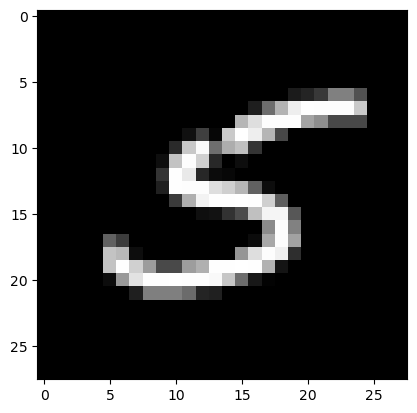

Prediction:  3
Label:  3


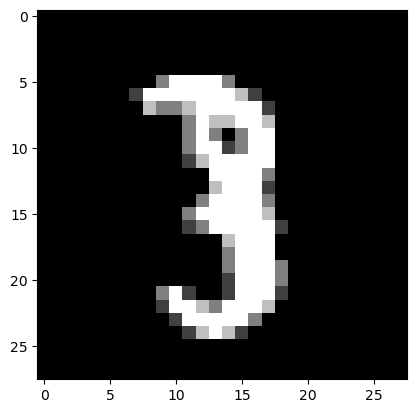

Prediction:  4
Label:  4


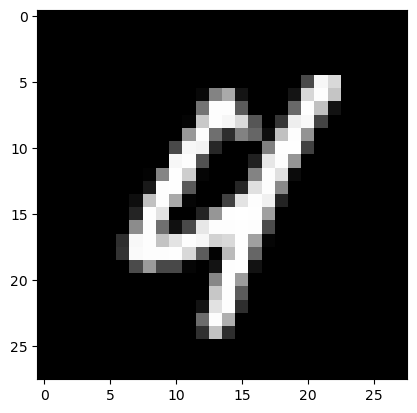

Prediction:  0
Label:  0


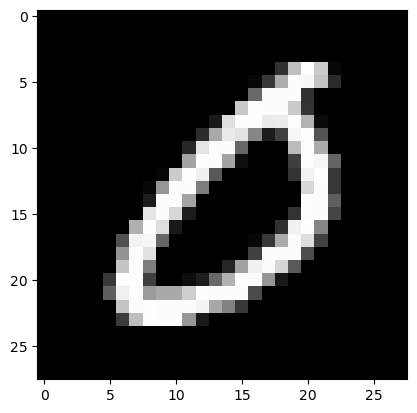

In [11]:
for i in a:
    test_prediction(i)